# Crash Course on Surviving the Math
Week of July 25, 2022

## Chapter 2 - First, a Minimal Intro to Python
For a deeper dive read Chapter 2 and as a quick reference, see [the Python 3 Cheat Sheet](https://www.pythoncheatsheet.org/cheatsheet/basics).

### Setting up the Environment

In [10]:
# This is how you import additional functionality via libraries:
import math
import sys
# This is how you install new packages
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} matplotlib
# .. and then include them
import numpy as np
import matplotlib.pyplot as plt


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



### Using the Environment

In [3]:
# This is a Python Commentm which starts with a '#' sign
# Below is Python Code


# This is how you declare and assign a scalar variable. Variables contain values that can also change.
myValue = 234.234

# This is how you declare and assign an array variable of multiple values (Numpy will use proper 'vectors')
myVector = [1, 1, 2, 3, 5, 8, 13]

# This is how you print out the value of a variable
print("My scalar value is %s" % myValue)
print("My vector has the list of values: %s" % myVector)
print("My vector's first element (zero-th index): %s" % myVector[0])

# You can do math:
print("Value * 2 = %s" % (myValue * 2))
print("Value / 2 = %s" % (myValue / 2))
print("Square root of Value = %s" % (math.sqrt(myValue)))
print("Square root of Value = %s" % (myValue ** 0.5))

# You can manipulate the array:
myVector.reverse()
print("Reversed vector has the list of values: %s" % myVector)
print("Reversed vector's first element (zero-th index): %s" % myVector[0])

My scalar value is 234.234
My vector has the list of values: [1, 1, 2, 3, 5, 8, 13]
My vector's first element (zero-th index): 1
Value * 2 = 468.468
Value / 2 = 117.117
Square root of Value = 15.304705158871895
Square root of Value = 15.304705158871895
Reversed vector has the list of values: [13, 8, 5, 3, 2, 1, 1]
Reversed vector's first element (zero-th index): 13


## Chapter 3 - Visualizations



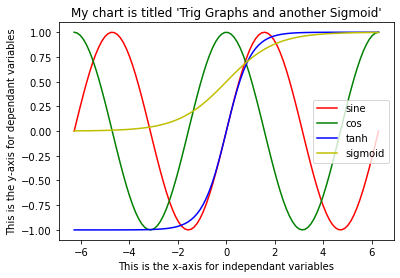

In [9]:
import matplotlib.pyplot as plt
e = 2.71828

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tanh(x)  # <--- Remember this "Sigmoidal" function for later (Sigmoid from Sigma from the greek letter, which in English starts with an 'S' and this curve is 'S' shaped)
y4 = [(1 / (1 + e ** (0-i))) for i in x] # <--- This is the other Sigmoid function - remember it too

fig, ax = plt.subplots()
ax.plot(x, y1, color='r', label='sine')
ax.plot(x, y2, color='g', label='cos')
ax.plot(x, y3, color='b', label='tanh')
ax.plot(x, y4, color='y', label='sigmoid')
plt.xlabel("This is the x-axis for independant variables")
plt.ylabel("This is the y-axis for dependant variables")
plt.title("My chart is titled 'Trig Graphs and another Sigmoid'")
plt.legend()
plt.show()



## Chapter 4 - Linear Algebra
### The Second Most Important Equation in Machine Learning
There are [may different 'distance' approaches](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa), but the most common is one we are familiar with by other names and simpler forms:


![Euclidian Distance](https://miro.medium.com/max/844/0*wv6oFAVd0_PQ50mX)


In code:

In [ ]:
def euclidianDistance(a, b):
    result = 0
    if len(a) == len(b):
        summation = 0
        for i in range(len(a)):
            summation = (a[i] - b[i]) ** 2
        result = summation ** 0.5
    else:
        print("WARNING: array sizes must be the same!")
    return result

The magnitude of the vector is effectively the distance from an 'origin' (all zero values) vector.  The L<sub>2</sub>-Norm, sometimes noted |X|<sub>2</sub>, is the Euclidian magnitude or Euclidian distance to the origin. Likewise the L<sub>1</sub>-Norm, sometimes noted |X|<sub>1</sub>, is the Manhattan distance to the origin.

Related is the Root-mean-squared (RMS) Error, which adds a normalizing term dividing the summation by the vector size before taking the square root. 

In [ ]:
def rmse(hypothesis, truth):
    result = 0
    if len(hypothesis) == len(truth):
        summation = 0
        for i in range(len(hypothesis)):
            summation = (hypothesis[i] - truth[i]) ** 2
        result = (summation/len(hypothesis)) ** 0.5        # <--- differs from Euclidian Distance here
    else:
        print("WARNING: array sizes must be the same!")
    return result


... but in the end, these are all forms of the [Minkowski Distance](https://en.wikipedia.org/wiki/Minkowski_distance): 

![Minkowski Distance](https://miro.medium.com/max/902/0*UbbyH2MUPb5ZBa64)

In code form:

In [36]:
def minkowski(a, b, p):
    result = 0
    if len(a) == len(b):
        summation = 0
        maxDiff = 0
        for i in range(len(a)):
            if p < 500:
                summation += abs(a[i] - b[i]) ** p
            maxDiff = max(maxDiff, abs(a[i] - b[i]))
        if p > 500:
            result = maxDiff
        else:
            result = summation ** (1.0/p)
    else:
        print("WARNING: array sizes must be the same!")
    return result


The value of 'p' transforms the equation from Manhattan distance (p=0, a.k.a. L<sub>1</sub>-Norm) to Euclidian distance (p=1, a.k.a. L<sub>2</sub>-Norm), or [Chebyshev distance](https://en.wikipedia.org/wiki/Chebyshev_distance) as p approaches infinity (which is effectively the max distance of any present index). For fractional values of 'p' where 0 < p < 1, the 'Agrawal' distance is extremely useful to mitigate the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). 

![Variations of P](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/2D_unit_balls.svg/967px-2D_unit_balls.svg.png)

### In Python

In [37]:
import random

N = 4
vec0 = [ 0 for x in range(N)]
vec1 = [random.gauss(5, 2) for x in range(N)] 
vec2 = [random.gauss(10, 2) for x in range(N)] 
vec1.sort()
vec2.sort()

print("Vector 0: %s" % vec0)
print("Vector 1: %s" % vec1)
print("Vector 2: %s" % vec2)

print("L1-Norm of Vector 1:{:>13,.2f}".format(minkowski(vec1, vec0, 1)))
print("L1-Norm of Vector 2:{:>13,.2f}".format(minkowski(vec2, vec0, 1)))
print("L2-Norm of Vector 1:{:>13,.2f}".format(minkowski(vec1, vec0, 2)))
print("L2-Norm of Vector 2:{:>13,.2f}".format(minkowski(vec2, vec0, 2)))

print("Agrawal   Distance: {:>13,.2f}".format(minkowski(vec1, vec2,    0.1)))
print("Manhattan Distance: {:>13,.2f}".format(minkowski(vec1, vec2,    1)))
print("Euclidian Distance: {:>13,.2f}".format(minkowski(vec1, vec2,    2)))
print("Chebyshev Distance: {:>13,.2f}".format(minkowski(vec1, vec2, 3000)))

Vector 0: [0, 0, 0, 0]
Vector 1: [2.9486791473765464, 4.090180962461589, 4.877534016012555, 5.09830317190807]
Vector 2: [8.738949029707832, 8.774131075313127, 9.94466268655835, 10.912741353699397]
L1-Norm of Vector 1:        17.01
L1-Norm of Vector 2:        38.37
L2-Norm of Vector 1:         8.67
L2-Norm of Vector 2:        19.27
Agrawal   Distance:  5,577,346.99
Manhattan Distance:         21.36
Euclidian Distance:         10.72
Chebyshev Distance:          5.81


## Chapter 5 - Statistics

### Continuous Probability Distributions




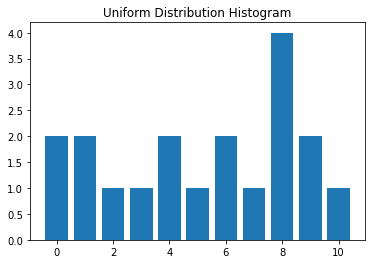

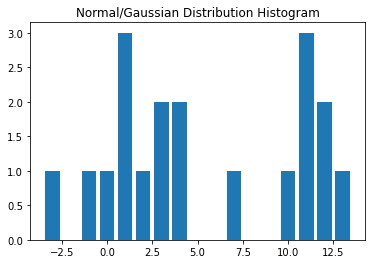

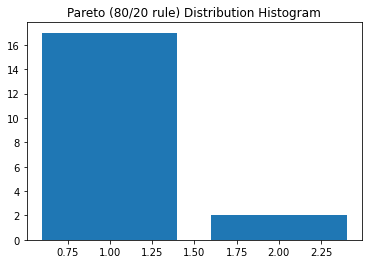

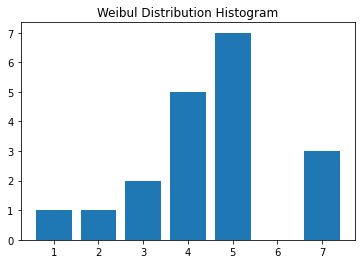

In [38]:
import random
from collections import Counter
#import matplotlib.pyplot as plt
#import numpy as np

# Uniform random between 0.0-1.0
randX = random.random()

# If N is low, the plots do not necessarily take shape. The number must be large enough to get "sufficient statistics"
N = 20
mean = 5
spread = 5

uniformSet = []
gaussianSet = []
paretoSet = []
weibullSet = []

for i in range(1,N):
    uniformSet.append(round(random.uniform(mean-spread,mean+spread),3))
    gaussianSet.append(round(random.gauss(mean,spread),3))
    paretoSet.append(round(random.paretovariate(mean),3))
    weibullSet.append(round(random.weibullvariate(mean,spread),3))

uniformSet.sort()
gaussianSet.sort()
paretoSet.sort()
weibullSet.sort()

#print("Uniform set: %s" % uniformSet)
#print("Normal set:  %s" % gaussianSet)
#print("Pareto set:  %s" % paretoSet)
#print("Weibull set: %s" % weibullSet)

uniformHistogram = Counter(round(x,0) for x in uniformSet)
normalHistogram = Counter(round(x,0) for x in gaussianSet)
paretoHistogram = Counter(round(x,0) for x in paretoSet)
weibullHistogram = Counter(round(x,0) for x in weibullSet)

plt.bar([x for x in uniformHistogram.keys()], uniformHistogram.values())
plt.title("Uniform Distribution Histogram")
plt.show()

plt.bar([x for x in normalHistogram.keys()], normalHistogram.values())
plt.title("Normal/Gaussian Distribution Histogram")
plt.show()

plt.bar([x for x in paretoHistogram.keys()], paretoHistogram.values())
plt.title("Pareto (80/20 rule) Distribution Histogram")
plt.show()

plt.bar([x for x in weibullHistogram.keys()], weibullHistogram.values())
plt.title("Weibul Distribution Histogram")
plt.show()

### Discrete Probability Distributions



Corpus: ['aa', 'aa', 'ab', 'ab', 'ab', 'ac', 'ac', 'ac', 'ad', 'ad', 'ae', 'ae', 'ae', 'af', 'af', 'ag', 'ba', 'ba', 'ba', 'bb', 'be', 'be', 'bf', 'bf', 'bf', 'bg', 'bg', 'bg', 'ca', 'ca', 'cc', 'cc', 'cd', 'ce', 'ce', 'cf', 'cg', 'cg', 'cg', 'db', 'db', 'db', 'dc', 'dc', 'dd', 'de', 'de', 'df', 'df', 'dg', 'ea', 'ea', 'ea', 'ea', 'eb', 'eb', 'ec', 'ed', 'ed', 'ed', 'ed', 'ee', 'ee', 'ef', 'ef', 'eg', 'fa', 'fb', 'fb', 'fb', 'fc', 'fc', 'fc', 'fc', 'fc', 'fd', 'fd', 'fd', 'fd', 'ff', 'ff', 'fg', 'ga', 'ga', 'gb', 'gc', 'gd', 'gd', 'gd', 'gd', 'gd', 'gd', 'gd', 'ge', 'ge', 'gf', 'gg', 'gg', 'gg']

 Historgram Data: Counter({'gd': 7, 'fc': 5, 'ea': 4, 'ed': 4, 'fd': 4, 'ab': 3, 'ac': 3, 'ae': 3, 'ba': 3, 'bf': 3, 'bg': 3, 'cg': 3, 'db': 3, 'fb': 3, 'gg': 3, 'aa': 2, 'ad': 2, 'af': 2, 'be': 2, 'ca': 2, 'cc': 2, 'ce': 2, 'dc': 2, 'de': 2, 'df': 2, 'eb': 2, 'ee': 2, 'ef': 2, 'ff': 2, 'ga': 2, 'ge': 2, 'ag': 1, 'bb': 1, 'cd': 1, 'cf': 1, 'dd': 1, 'dg': 1, 'ec': 1, 'eg': 1, 'fa': 1, 'fg': 1, 

Text(0.5, 1.0, '2-gram/digraph Distribution Histogram')

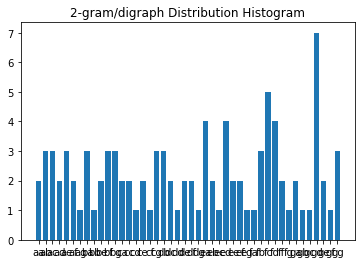

In [17]:
import random
from collections import Counter 

alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
corpus = []
for i in range(1,100):
    word = ""
    for j in range (1,3):
        word = word + alphabet[random.randint(0,6)]
    corpus.append(word)
corpus.sort()
print("Corpus: %s" % corpus)

corpusHistogram = Counter(x for x in corpus)
print("\n Historgram Data: %s" % corpusHistogram)
plt.bar([x for x in corpusHistogram.keys()], corpusHistogram.values())
plt.title("2-gram/digraph Distribution Histogram")
#plt.show()



### Statistics and Randomness in Python



## Chapter 6 - Probability

### Joint Probability

### Priors

### Bayes Formula (or the Third Most Important Formula in Machine Learning)
Devised by Thomas Bayes in the 1700's, but now a critical for predictive modeling and analysis:

![Bayes Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/c1a7279a1639d92d751e0f2d3aa54e62a2ddb1e8)

The common formulation and use deals with seemingly likely outcomes weighted by other information:

![BayesUse](https://wikimedia.org/api/rest_v1/media/math/render/svg/b01f679001d8f19c6c6036f1ac66ca3c3f400258)

### The Monte Hall Problem
Imagine you are at a game show, with three doors. One has a good prize, two have a bad prize (goat?). You choose one:

![Monte Hall Step 1](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/220px-Monty_open_door.svg.png)

Then the host reveals one door with two assumptions:

1) The Host will NOT reveal the door you chose first
2) The Host will NOT reveal the prize

The host then asks if you want to keep your original door choice, or switch to the remaining door. This is your final choice and you will get the prize (or goat) behind your final decision. What choice should you make to maximize your probability of winning the prize?

![Monte Hall Step 2](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Monty_Hall_Problem_-_Standard_probabilities.svg/330px-Monty_Hall_Problem_-_Standard_probabilities.svg.png)

Let's prove the Monte Hall solution using Monte Carlo (no relation):

Results with 3 doors and 100 trials
Proportion of wins without switching: 41.00%
Proportion of wins with switching: 69.00%


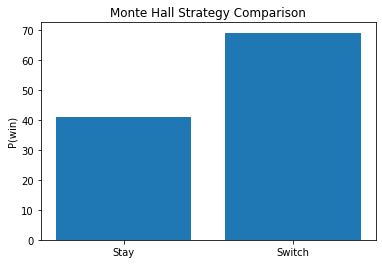

In [18]:
import random

# Let D = number of doors in the game
D=3

# Let us run these many trials (large number for sufficient statistics)
TRIALS=100

# These will be our two strategies
SWITCH_STRATEGY=True
STAY_STRATEGY=False

# Define a single instance/execution of the game
def monteHallGame(strategy):
    # Create D Doors
    door_list = [x+1 for x in range(D)]
    # Place the Prize
    door_with_prize = random.randint(1, D)
    # Choose first door
    door_I_choose  = random.randint(1, D)
    # Remove all but two doors keeping with the rules of the game
    remaining_doors_list = [door_I_choose]
    if door_I_choose == door_with_prize:
        remaining_doors_list.append(random.randint(1, D))
    else:
        remaining_doors_list.append(door_with_prize)
        
    if strategy == SWITCH_STRATEGY: 
        # If switching, remove my door from choices
        remaining_doors_list.remove(door_I_choose)
        # Then my final choice is the remaining door
        door_I_choose = remaining_doors_list[0] 
                
    # return True (1) if we chose the prize
    return door_with_prize == door_I_choose

# Manage multiple independant expirements of the game
def monteCarlo(strategy):
    winCount = 0
    for i in range(TRIALS):
        winCount += monteHallGame(strategy) 
    return winCount


switch_wins = monteCarlo(SWITCH_STRATEGY)
stay_wins   = monteCarlo(STAY_STRATEGY)

print('Results with %s doors and %s trials' % (D,TRIALS))
print('Proportion of wins without switching: {:.2f}%'.format(100.0*stay_wins/TRIALS))
print('Proportion of wins with switching: {:.2f}%'.format(100.0*switch_wins/TRIALS))

labels = ["Stay", "Switch"]
results = [stay_wins, switch_wins]
plt.bar(range(2), results)
plt.title("Monte Hall Strategy Comparison")
plt.ylabel("P(win)")
plt.xticks(range(2),labels)
plt.show()

... but if you still don't believe it, here are some different perspectives:

* From the movie '21': ['21' Movie depiction of Monte Hall](https://youtu.be/iBdjqtR2iK4)
* My favorite [explination by Numberphile](https://youtu.be/4Lb-6rxZxx0)
* A less mathmatical by very historical view [as explained by Vox](https://youtu.be/ggDQXlinbME)
* An entertaining [explination by VSauce](https://youtu.be/TVq2ivVpZgQ) ... this guy is weird.